# Lecture 2: Integral equations/quadratures

## Previous lecture
- Intro
- IE for external problems

## Todays lecture
- IE discretization
- Nystrom, collocation, Galerkin method

## Simplest integral equation

The simplest integral equation we talked about reads

$$\int_{\partial \Omega} \frac{q(y)}{\Vert x - y \Vert} dy = f(x), \quad x \in \partial \Omega,$$
where $\Omega$ is a certain domain in 3D.

The general form of a first-kind integral equation is

$$
\int_{\partial \Omega} q(y) G(x, y) dy = f(x), \quad x \in \partial \Omega,
$$
where $$G(x, y)$$ is a **Green function** of the PDE.

## Typical Green functions
The Green function of a PDE operator A satisfies
$$A G(x, y) = \delta(y), $$
i.e. it plays the role of the "inverse" of the operator without boundaty conditions.  

It is also called **free-space** Green function. The Green function can also incorporate the boundary condition.

## Green functions with boundary conditions and reflection method

Suppose we want to find a function $G(x, y)$ such that

$$\Delta_x G(x, y) = \delta (y), G(x, y) \mid_{x \in \partial \Omega} = 0. $$

If we found such a function, solution to

$$\Delta u = f,$$

is given by the **explicit integral**

$$u(x) = \in_{\Omega} G(x, y) f(y)  dy.$$

## Reflection method

In a few cases, you can write down such a Green function, typically based on the **method of reflections**.

For a Dirictlet bouundary conditions, we can use not only charge located at $y$, but also many other charges that lie outside $\Omega$ and give the required b.c.

- A plane - two charges are ok.
- A cube - many reflections, infinite series

## Discretization
Now to discretization of the equation
$$\int_{\partial \Omega} \frac{q(y)}{\Vert x - y \Vert} dy = f(x), \quad x \in \partial \Omega,$$

Steps of discretization:
1. Select a finite-dimensional subspace, spanned by basis function $\phi_i, i = 1, N$. Typically, $\phi_i$ are **local basis functions** defined on a certain mesh $\mathcal{T}$ over the surface.
2. Look for the solution in the form
   $$q(y) \approx \sum_{i=1}^N q_i \phi_i(y)$$

Note, that the basis functions can be even **piecewise-constant**, compared to PDEs, where **generally** they have to be at least piecewise-linear for Finite Element Method (they can be piecewise-constant for **Diccontinious Galerkin**, but that is more an exception

## Discretization (2)
$$\int_{\partial \Omega} \frac{q(y)}{\Vert x - y \Vert} dy = f(x), \quad x \in \partial \Omega,$$

Suppose that $\mathrm{supp}(\phi_i) = T_i$ (i.e., local support). Then, 

$$ \sum_{i=1}^N q_i \int_{T_i} \frac{\phi_i(y)}{\Vert x - y \Vert} dy = f(x).$$

This has to hold for all $x$, i.e. it is **infinite amount** of equations. There are two ways of dealing with this situation:

1. Galerkin method
2. Collocation method.

## Galerkin method
The Galerkin method takes  the equation
$$ \sum_{i=1}^N q_i \int_{T_i} \frac{\phi_i(y)}{\Vert x - y \Vert} dy = f(x),$$
and multiplies it by $\phi_j(x)$ and integrates over $T_j$. Then we get

$$ \sum_{i=1}^N q_i \int_{T_j} \int_{T_i} \frac{\phi_j(x) \phi_i(x)}{\Vert x - y \Vert} dx dy = \int_{T_j} f(x) \phi_j(x) dx.$$
, 
This is a **square system** of linear equations of the form
$$
   A q = f,
$$
where $$A = \int_{T_j} \int_{T_i} \frac{\phi_j(x) \phi_i(x)}{\Vert x - y \Vert} dx dy.$$  Everything is fine, the matrix is symmetric (it can be also shown that it is positive definite, let us do that), but the evaluation of the element requires 
**6D** integral to be evaluated. That is main computational problem, thus engineers often use a much more simple collocation method,

## Collocation method
Collocation method consists of taking the equation
$$ \sum_{i=1}^N q_i \int_{T_i} \frac{\phi_i(y)}{\Vert x - y \Vert} dy = f(x),$$
at some **collocation points** $x_j$. 

Consider **piecewise-constant case**, i.e. $\phi_i(y) = 1$ on $T_i$ and $0$ otherwise. Then the most natural choice for collocation points are **centers of the triangles**,

and we again get a **square** linear system

$$A q = f,$$

but now me

$$A_{ij} = \int_{T_i} \frac{dy}{\Vert x_j - y \Vert},$$
i.e. it has the meaning of **uniformly charged** triangle.

Note that this matrix is **non-symmetric**, so you can not use symmetric-oriented methods.

## Nystrom method

The Nystrom method is just another simplication of the collocation method (as collocation method can be considered as a quadrature applied to the Galerkin method).

We just approximate

$$
    A_{ij}  = \int_{T_i} \frac{dy}{\Vert x_j - y \Vert} dy \approx S_i \frac{1}{x_i - y_j}.
$$ 

If the **source triangle** $T_i$ is sufficiently far from the **receiver** $y_j$, indeed, this can be a v bery good approximaation.

If $y_j$ lies inside the triangle, then the approximation can be  really bad.



## Locally corrected Nystrom

Typically, a **locally corrected Nystrom** is used: much more advanced quadratures are used in the **close zone**, where the singularity of the integrals appears. The concept is as follows:

- To evaluate the matrix-by-vector product $Aq$ it is split into the **far part** and **close part**. 
- Close part is evaluated separately, far is evaluated using a simple quadrature

**Far-close** splitting is the key to **fast methods**

## Computing the integrals
The main art about Galerkin/collocation methods is **computation of singular integrals**, which can not be handled by standard Gauss quadratures in the close zone.

There are several ways

- Analytic evaluation
- Subtraction of singularity, singularity is integrated analytically, remainder by Gauss
- Gauss-Duffy quadrature 
- Schwab-Sauter quadrature
- Rokhlin generalized quadratures

## Model integral 

We will study the integrals of the form

$$\int^b_a \int^d_c \frac{\phi(x) \phi(y)}{\Vert x - y \Vert} dy,$$

where $$\phi(x), \phi(y)$$ are standard local basis function (constant or linear).

## Computing the simplest integral
We can actually compute the anti-derivative of the integral in question, by taking successive integrals

$$
   \frac{1}{\sqrt{x^2 + y^2}}
$$
\begin{equation}
\begin{split}
F(x, y) = \int \int \frac{1}{\sqrt{x^2 + y^2}} dx dy = \\
-y + 
y \log(x + \sqrt{x^2 + y^2}) + x \log(y + \sqrt{x^2 + y^2}),
\end{split}
\end{equation}

and the final integral is just 
$$
   I(x_0, y_0, x_1, y_1) = F(x_0, y_0) + F(x_1, y_1) - F(x_0, y_1) - F(x_1, y_0),
$$

(generalization of the Newton-Leibniz formula)

## Smarter than Nystrom
You can be **a little bit** smarter: approximate $1/r$ by something that can be well-integrated.  

By a sum of separable functions!

$$\frac{1}{\Vert x - y\Vert } \approx \sum_{\alpha=1}^r u_{\alpha}(x) u_{\alpha}(y)$$

We have used the symmetry.

But how to compute these functions $u_{\alpha}$?  

Such representation is obviously useful, since in Galerkin formula we can replace 4D integration by 2D integration,

$$\int \int \phi_i(x) \phi_j(y) u_{\alpha}(x) u_{\alpha}(y) dx dy = \int \phi_i(x) u_{\alpha}(x) dx \int \phi_j(y) u_{\alpha}(y) dy.$$

## Exponential sums

A very useful approach is based on so-called **exponential sums**. A simple identity has the form

$$\frac{1}{\sqrt{x}} = \frac{1}{\sqrt{\pi}} \int^{\infty}_0 \frac{e^{-px}}{\sqrt{p}} dp.$$

It can be very useful in separating variables.


## A quadrature

Suppose we have a quadrature for the integral:

$$ \frac{1}{\sqrt{x}} = \frac{1}{\sqrt{\pi}} \int^{\infty}_0 \frac{e^{-px}}{\sqrt{p}} dp. \approx \sum_{k} w_k e^{-p_k x}.$$

Then put 

$$x := x^2 + y^2$$

and we get the sum of <font color='red'> Gaussians </font> on the right.

## Sum of Gaussians

$$\frac{1}{r} \approx \sum_{k} w_k e^{-p_k (x^2 + y^2)},$$

and the integrals reduce to the 1D integrals

$$
   \int_a^b e^{-p_k x^2} dx, 
$$

and this can be expressed via the <font color='red'> Error functions </font> (and there is a standard numpy erfc function)

## But who you can approximate?

We reduced the problem to the problem of creating a good quadrature rule for the integral

$$\int^{\infty}_0 \frac{e^{-px}}{\sqrt{p}} dp$$

You have to do the $p = e^t$ (why do we do so?) and we the new integral

$$
\int^{\infty}_{-\infty} e^{-e^{t} x + t/2} dt
$$

and this integral is then approximate by **trapezoidal rule** $t_k = a_t + k h_t, \quad h_t = (b_t - a_t)/K$


The integral is doubly exponentially decaying, and also its Fourier transform is decaying exponentially fast.

Thus, trapezoidal rule has **exponential convergence** in this setting

A short demo...

/Users/ivan/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


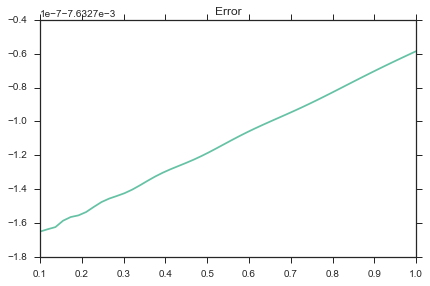

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', palette='Set2')
sns.despine()
%matplotlib inline
a = -10
b = 20
n = 70
t = np.linspace(a, b, n)
h = t[1] - t[0]
w = np.ones(n) * h
w[0] = h/2
w[n-1] = h/2
w = w * np.exp(0.5 * t)/np.sqrt(math.pi)
ps = np.exp(t)
x = np.linspace(0.1, 1)
fun = 1.0/np.sqrt(x)
appr = 0 * x
for i in xrange(n):
    appr = appr + w[i] * np.exp(-(x) * ps[i])
#plt.plot(x, fun)
ax = plt.subplot(1, 1, 1)
ax.plot(x, appr - fun)
#ax.set_title('Approximation error by %d Gaussians' % n)
ax.set_title('Error')
plt.tight_layout(.8)

## A sidenote about fitting by sum of exponentials
- Approximation of a given function by a sum of exponentials is a ill-posed problem
- Original method by Prony (1795)
- Recent work by [G. Beylkin, et. al, Approximation by exponential sums revisited](https://www.google.ru/url?sa=t&rct=j&q=&esrc=s&source=web&cd=2&cad=rja&uact=8&ved=0CCYQFjAB&url=http%3A%2F%2Famath.colorado.edu%2Fpub%2Fwavelets%2Fpapers%2FBEY-MON-2010.pdf&ei=Cok1VZHkJKLnygO7hYCgBw&usg=AFQjCNGRcxece5lCuy9N7oheTBOzOpcSYw&sig2=Rf3DPGBAMmYO4parmQXzFQ&bvm=bv.91071109,d.bGQ) 

## Integration over triangles

Exponential sums are well-applicable to the integration over **rectangles**. But the most typical choice is the integration over **triangles**.

Consider the standard triangle $$0 \leq x \leq 1, \quad 0 \leq y \leq x.$$

Consider the integral $$\int_{T} h dS,$$


which can be written as

$$
    \int^{1}_{0} dx \int^x_0 h(x, y)dy.
$$




## Duffy transformation

Duffy transformation is a **mapping** from rectangle to triangle, given by formulas

$$x = x, \quad y = x u, \quad 0 \leq u \leq 1,$$

i.e. it is a mapping from $(x, u)$ to $(x, y)$.

## Duffy transformation(2)
Then, 

we have

$$\int^{1}_0 \int^{1}_0 h(x, xu) x dx du.$$

Recall the singularity:

$$h(x, y) = \frac{g(x, y)}{\sqrt{x^2 + y^2}},$$

therefore the $x$ cancels out and we have

$$\int \int \frac{g(x, xu)}{\sqrt{1 + u^2}} dx dx, $$

which is **non-singular**.

## Efficient quadratures (papers)
- C. Schwab,  S. Sauter [Efficient automatic quadrature in 3-d Galerkin BEM](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.45.4312&rep=rep1&type=pdf)
- A. Polimeridis, Traianos V Yioultsis [On the direct evaluation of weakly singular integrals in Galerkin mixed potential integral equation formulations](http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=4618709)

## Rokhlin generalized quadratures

Finally, I will discuss a general quadrature idea. For a particular **kernel** of the integral operator, the quadrature **points and weights** in 

$$\int K f \approx \sum_i w_i (K f)(x_i),$$

have to be defined only once.

## Idea in 1D

I will illustrate the idea in 1D to compute

$$\int^1_0 f(x) dx \approx \sum_{j=1}^M f(x_j) w_j$$

and this quadrature has to integrate certain subset of functions $f_1, \ldots, f_n$,

i.e.

$$\sum_{j=1}^M f_i(x_j) w_j = \int^1_0 f_i(x) dx.$$

## Assumptions

The quadrature formula with nodes $x_1, \ldots, x_m$ and weights $w_1, \ldots, w_m$:

- Integrates $f_i, i = 1, \ldots, n$ and their products
- $f_i$ form **orthonormal basis set** in $L_2[0, 1]$
- $m \gg n$


## Linear system for the weights

Then we have a linear $n \times m$ system for the weights, which is **underdetermined**.

Specifically, 

$$\sum_{j=1}^m f_i(x_j) \sqrt{w_j} v_j  = b_n.$$

Since the quadrature formula integrates the products, the matrix has singular values $0$ or $1$ (prove!).

We can also set most of the solution coefficients to zero, and leave only $m$ non-zero entries.

If we denote the positions by $i_1, \ldots, i_n$, the final quadrature will read

$$\int^1_0 f(x) dx \approx \sum_{k=1}^n f(x_{i_k}) z_{k} \sqrt{w_{i_k}}.$$

## Summary of the gen. quadrature idea
- Start with an orthonormal basis set
- Select very large quadrature with many points
- Select a "pruned" quadrature.

The approach can be generalized to singular integrals.

## Summary of the lecture

- Basic discretization schemes (Galerkin, collocation, Nystrom)
- Some approaches to compute singular integrals

## Next lecture
- Fast methods: computation of the convolution via FFT, idea of precorrected FFT.
- More integral equation kernels

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()